## MNIST Exploration
#### Hands-On ML Chapter 3

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import fetch_mldata
mnist = fetch_mldata('MNIST original')
mnist

{'COL_NAMES': ['label', 'data'],
 'DESCR': 'mldata.org dataset: mnist-original',
 'data': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ..., 
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 'target': array([ 0.,  0.,  0., ...,  9.,  9.,  9.])}

In [3]:
X, y = mnist['data'], mnist['target']

In [4]:
y.shape

(70000,)

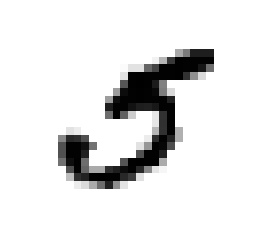

In [5]:
% matplotlib inline
import matplotlib

some_digit = X[36000]
some_digit_image = some_digit.reshape(28, 28)

plt.imshow(some_digit_image, cmap=matplotlib.cm.binary, interpolation="nearest")
plt.axis("off")
plt.show()

In [6]:
y[36000]

5.0

sklearn provides built in data sets, one of which is a bunch of images of written numbers. You can see that we used matplotlib's imshow() function to display an image of the number. It's a 28x28 image, so there's 784 pieces of data per each column (0, 255) each representing a shade of black and white. This data set is already split up into a training and test sets for us.

In [7]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [8]:
X_train[[30012, 1]]


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

Aurelien uses numpy's random permutation function here. Some explanation: if you call X_train by itself, it will display the array in a default order. If you provide a list of indeces, it will provide the rows that you asked for in the specified order. Thus, when we run random permutation, we get a list of 60000 shuffled numbers, and then we pass that as an argument to the array, which then returns a different array based on the shuffled list, which we save into a variable. The permutation function does not shuffle it inplace. Sklearn also provides a shuffle function that does not affect the original array, but numpy has its own shuffle function that will simply do it in place. It will modify the original array.

The sklearn shuffle is in sklearn.utils

In [9]:
shuffle_index = np.random.permutation(60000)
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]

In [11]:
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5) # These are the target classifications for each image

Above, we're creating target classifications as either 5 or not-5, thus, a binary classifier. 

Aurelien wants us to use a stochastic gradient descent in order to classify images. This is a classifier that orbits around the middle term 'gradient'. Gradient is issentially the slope of a function in terms multivariable calculus. This means that it it represents the slope as a vector. From Wikipedia, "...the gradient points in the direction of the greatest rate of increase of the function, and its magnitude is the slope of the graph in that direction." Descent describes a method of searching for values using the gradient, and stochastic is a stipulation to this function on how samples are taken and how to iterate through them. There is also batch gradient descent. In sum, stochastic gradient descent is an algorithm to find the max or min of a function using the gradient of that function using sample subsets and fewer iterations. Aurelien will talk about this in more detail later, and it will be discussed in multivariable calculus (calculus III).

In [13]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', n_iter=5, n_jobs=1,
       penalty='l2', power_t=0.5, random_state=42, shuffle=True, verbose=0,
       warm_start=False)

In [16]:
sgd_clf.predict([some_digit])
y[36000]

5.0

I needed to take a second to wrap my head around what we did here. We passed the array of values and a list of booleans to the classifier. We're not explicitly telling the classifier what a 5 is. In this instance, we're just passing booleans, and guesses if something is true or false based on the arrangement of the pixels. We can make another list of booleans based on whichever number we wanted and do the same thing. 